## White wine EDA

## Import libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm
#import statsmodels
#from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from statsmodels.discrete.discrete_model import OrderedModel
#from mord import LogisticAT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

## Load data

In [2]:
white_wine_path='./Data/no-duplicates-winequality-white.csv'
w_df=pd.read_csv(white_wine_path, sep=',')
w_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [3]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [50]:
w_df['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

## Modeling

Here we use a multinomial logistic regression model on the wine quality data. We use the 'quality' column as the response but bin them into categories of [0-4], [5,6], [7,10] for low, medium, and high respectively.

#Our response variable is 'quality'. This variable takes on discrete values from 0-10 inclusive. Because our response variable is non-continuous, regular OLS regression may not be suitable as it outputs a real number. Classification algorithms are useful for discrete data but does not make use of the natural ordering of the response variable. A middle ground that could help with these two issues is the use of an ordinal logistic regression model.#

#### Preprocessing


In [5]:
ranges=[0,4,6,10]
group_names=['low','medium', 'high']
w_df['quality_bin']=pd.cut(w_df['quality'], bins=ranges, labels=group_names)
cat_type = pd.CategoricalDtype(categories=['low','medium','high'], ordered=True)
w_df['quality_bin'] = w_df['quality_bin'].astype(cat_type)

In [6]:
w_df['quality_bin'].dtype

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

In [7]:
w_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_bin'],
      dtype='object')

In [9]:
x=w_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=w_df['quality_bin']

#### Train test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [11]:
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((2970, 11), (2970,), (991, 11), (991,))

#### Multinomial Logistic Regression

In [24]:
#one versus all Logistic Regression
mlrModel1=LogisticRegression(max_iter=2000,multi_class='ovr')
mlrModel1.fit(x_train,y_train)
mlrModel1.score(x_train,y_train)

0.7784511784511785

In [28]:
y_pred=mlrModel1.predict(x_test)
cm=confusion_matrix(y_test,y_pred, labels=['low', 'medium', 'high'])

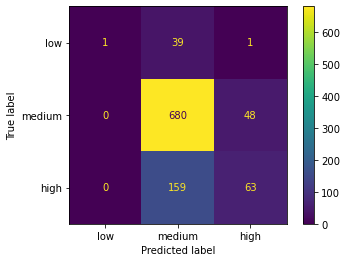

In [37]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['low', 'medium', 'high'])
disp.plot()
plt.show()

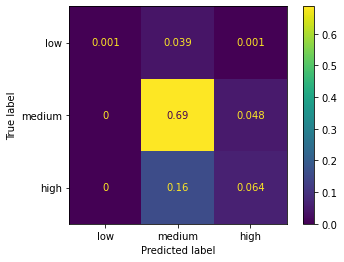

In [40]:
cm=confusion_matrix(y_test,y_pred, labels=['low', 'medium', 'high'],normalize='all')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['low', 'medium', 'high'])
disp.plot()
plt.show()

#### Multinomial Logistic Regression: reducing redundancy

We can see from the correlation matrix below that density has high correlation with residual suagar and alcohol, maybe removing this will improve our model.

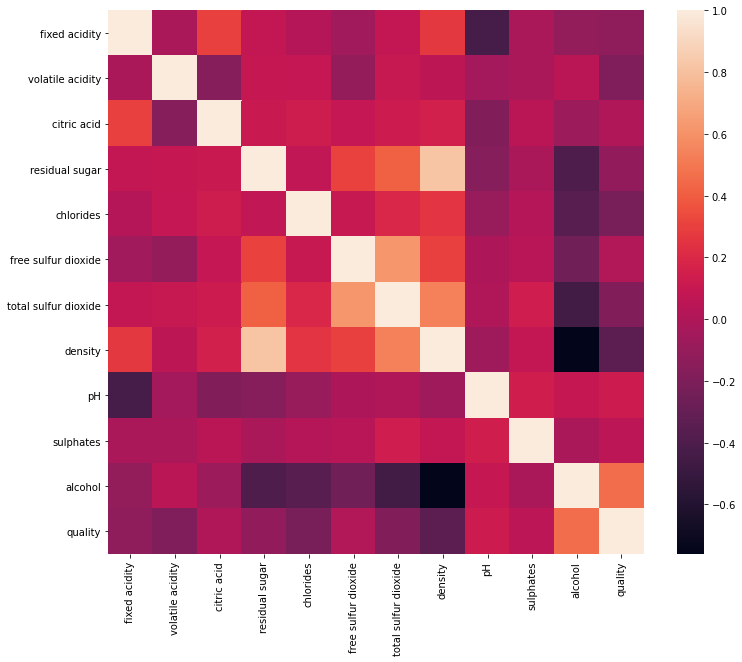

In [43]:
plt.subplots(figsize=(12,10))
sns.heatmap(w_df.corr());

In [44]:
x=w_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol']]
y=w_df['quality_bin']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [45]:
mlrModel2=LogisticRegression(max_iter=2000,multi_class='ovr')
mlrModel2.fit(x_train,y_train)
mlrModel2.score(x_train,y_train)

0.7683501683501683

In [47]:
y_pred=mlrModel2.predict(x_test)
cm=confusion_matrix(y_test,y_pred, labels=['low', 'medium', 'high'])

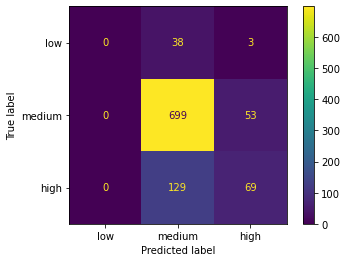

In [48]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['low', 'medium', 'high'])
disp.plot()
plt.show()

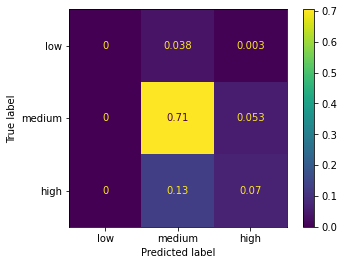

In [49]:
cm=confusion_matrix(y_test,y_pred, labels=['low', 'medium', 'high'],normalize='all')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['low', 'medium', 'high'])
disp.plot()
plt.show()

In [51]:
y_test.value_counts()

medium    752
high      198
low        41
Name: quality_bin, dtype: int64

currently our model does only slightly better than the simple model of choosing everything to be of medium quality. more work needs to be done